In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
from sklearn.naive_bayes import MultinomialNB

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
sns.set_theme(style="whitegrid")

In [10]:
print("Libraries imported successfully!")

Libraries imported successfully!


In [11]:
data = {
    'email': [
        "Congratulations! You've won a free iPhone. Click here!",
        "Hi John, can we schedule a meeting for tomorrow at 10 AM?",
        "Urgent: Your account has been compromised. Verify your details now!",
        "Meeting agenda attached. Please review before our call.",
        "Exclusive offer: Get 50% off on all products today only!",
        "Regarding your recent inquiry, here is the information you requested.",
        "Your package is delayed. Track it here now!",
        "Project update: We've made great progress this week.",
        "Limited time offer! Claim your prize money!",
        "Confirming your appointment for Tuesday."
    ],
    'label': [
        'spam',
        'ham',
        'spam',
        'ham',
        'spam',
        'ham',
        'spam',
        'ham',
        'spam',
        'ham'
    ]
}

df = pd.DataFrame(data)

print("Dataset created:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"Label distribution:\n{df['label'].value_counts()}")

Dataset created:
                                               email label
0  Congratulations! You've won a free iPhone. Cli...  spam
1  Hi John, can we schedule a meeting for tomorro...   ham
2  Urgent: Your account has been compromised. Ver...  spam
3  Meeting agenda attached. Please review before ...   ham
4  Exclusive offer: Get 50% off on all products t...  spam

Dataset shape: (10, 2)
Label distribution:
label
spam    5
ham     5
Name: count, dtype: int64


In [12]:
X = df['email']
y = df['label']

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

print(f"Original text shape: {X.shape}")
print(f"Vectorized text shape: {X_vectorized.shape}")
print(f"Number of unique words (features): {len(vectorizer.get_feature_names_out())}")


X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


Original text shape: (10,)
Vectorized text shape: (10, 71)
Number of unique words (features): 71

Training set shape: (8, 71)
Testing set shape: (2, 71)
Training labels shape: (8,)
Testing labels shape: (2,)


In [13]:
# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model using the training data
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


Predictions made on the test set.

--- Model Evaluation ---
Accuracy: 1.00
Precision (Spam): 1.00
Recall (Spam): 1.00
F1-Score (Spam): 1.00

Confusion Matrix:
[[1 0]
 [0 1]]


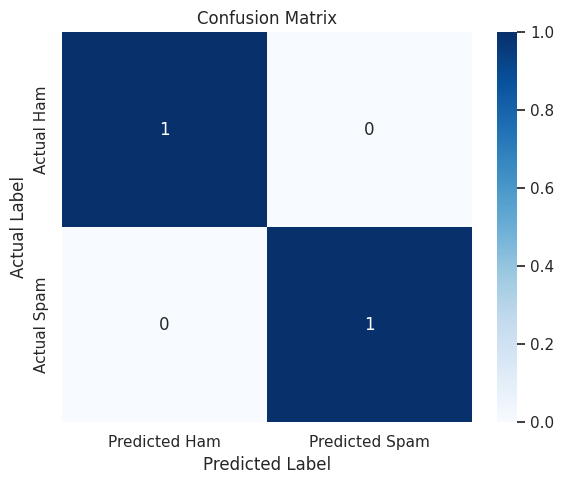


Classification Report:
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00         1
        spam       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print("Predictions made on the test set.")
print("\n--- Model Evaluation ---")

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 2. Precision Score
# Precision for 'spam' class
precision_spam = precision_score(y_test, y_pred, pos_label='spam')
print(f"Precision (Spam): {precision_spam:.2f}")

# 3. Recall Score
# Recall for 'spam' class
recall_spam = recall_score(y_test, y_pred, pos_label='spam')
print(f"Recall (Spam): {recall_spam:.2f}")

# 4. F1-Score
# F1-score for 'spam' class
f1_spam = f1_score(y_test, y_pred, pos_label='spam')
print(f"F1-Score (Spam): {f1_spam:.2f}")

# 5. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['ham', 'spam']) # Specify labels for clear order
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# 6. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))
